# Atividade MAPA
## Disciplina Visualização de Dados
## Curso Ciência de Dados e Análise Comportamental - Unicesumar

Considere o conjunto de dados "Automobile Data Set" disponibilizado pela UCI Machine Learning Repository. Esse dataset contém informações sobre diferentes atributos de veículos.

Para realizar a importação, análise e transformação dos dados, você deve utilizar as bibliotecas Pandas e Matplotlib. A seguir, estão listadas as etapas que cria uma visualização de dados com base na transformação dos dados:

1. Importação dos dados: importe o arquivo CSV que está disponível em https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.
2. Descrição estatística: forneça informações como a contagem de registros, média, desvio padrão, valores mínimo e máximo e os quartis para cada coluna numérica.
3. Transformação dos dados: substituia os valores faltantes por 0 e converta a coluna 'price' para valores numéricos em vez de strings.
4. Visualização de dados: mostre a variação de preço (‘price’) em relação ao tamanho do motor ('engine-size') por intermédio de um gráfico de dispersão.

## 1. Importando os dados

Primeiramente, vamos importar as bibliotecas necessárias para a atividade. A biblioteca `Pandas` é utilizada para manipular os dados do conjunto de dados. A biblioteca `Seaborn` será utilizada para plotar os gráficos para visualização.

In [7]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', 10) # limite de colunas a ser exibida no DataFrame.

Agora vamos importar o conjunto de dados. Uma análise prévia mostra que este conjunto de dados não tem cabeçalho. As informações sobre o cabeçalho estão em outro arquivo.

Devido a isso, utilizamos os parâmetros `header=None` para informar que não há cabeçalho, caso contrário, a primeira linha dos dados será considerado como cabeçalho.


O parâmetro `names=` insere os nomes de cada coluna do conjunto de dados.

In [8]:
df = pd.read_csv('Data\imports-85.data', header=None, names=[
    'symboling',
    'normalized-losses',
    'make',
    'fuel-type',
    'aspiration',
    'num-of-doors',
    'body-style',
    'drive-wheels',
    'engine-location'
    'wheel-base',
    'length',
    'width',
    'height',
    'curb-weight',
    'engine-type',
    'num-of-cylinders',
    'engine-size',
    'fuel-system',
    'bore',
    'stroke',
    'compression-ratio',
    'horsepower',
    'peak-rpm',
    'city-mpg',
    'highway-mpg',
    'price'
    ])
df

,symboling,normalized-losses,make,fuel-type,aspiration,...,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,?,alfa-romero,gas,std,two,...,111,5000,21,27,13495
3,?,alfa-romero,gas,std,two,...,111,5000,21,27,16500
1,?,alfa-romero,gas,std,two,...,154,5000,19,26,16500
2,164,audi,gas,std,four,...,102,5500,24,30,13950
2,164,audi,gas,std,four,...,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...
-1,95,volvo,gas,std,four,...,114,5400,23,28,16845
-1,95,volvo,gas,turbo,four,...,160,5300,19,25,19045
-1,95,volvo,gas,std,four,...,134,5500,18,23,21485
-1,95,volvo,diesel,turbo,four,...,106,4800,26,27,22470


Acima está o conjunto de dados devidamente preenchido com o cabeçalho.

## 2. Descrição Estatística

Com o comando `describe` podemos obter a contagem de registros (count), média (mean), desvio padrão (std). valores mínimos (min), valores máximos (max) e os quartis (25%, 50%, 75%) de cada coluna numérica.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine-locationwheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


O comando acima só exibe as colunas que contém valores válidos. Para exibir os valores nulos ou faltantes, devemos incluir o parâmetro `include='all`.

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,...,min,25%,50%,75%,max
symboling,205,52,?,41,NaN,...,NaN,NaN,NaN,NaN,NaN
normalized-losses,205,22,toyota,32,NaN,...,NaN,NaN,NaN,NaN,NaN
make,205,2,gas,185,NaN,...,NaN,NaN,NaN,NaN,NaN
fuel-type,205,2,std,168,NaN,...,NaN,NaN,NaN,NaN,NaN
aspiration,205,3,four,114,NaN,...,NaN,NaN,NaN,NaN,NaN
num-of-doors,205,5,sedan,96,NaN,...,NaN,NaN,NaN,NaN,NaN
body-style,205,3,fwd,120,NaN,...,NaN,NaN,NaN,NaN,NaN
drive-wheels,205,2,front,202,NaN,...,NaN,NaN,NaN,NaN,NaN
engine-locationwheel-base,205.0,NaN,NaN,NaN,98.756585,...,86.6,94.5,97.0,102.4,120.9
length,205.0,NaN,NaN,NaN,174.049268,...,141.1,166.3,173.2,183.1,208.1


Note que há valores <b>NaN</b>, que serão tratados na questão 3.

## 3. Transformação dos Dados

Primeiro, vamos checar as informações:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 3 to -1
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   symboling                  205 non-null    object 
 1   normalized-losses          205 non-null    object 
 2   make                       205 non-null    object 
 3   fuel-type                  205 non-null    object 
 4   aspiration                 205 non-null    object 
 5   num-of-doors               205 non-null    object 
 6   body-style                 205 non-null    object 
 7   drive-wheels               205 non-null    object 
 8   engine-locationwheel-base  205 non-null    float64
 9   length                     205 non-null    float64
 10  width                      205 non-null    float64
 11  height                     205 non-null    float64
 12  curb-weight                205 non-null    int64  
 13  engine-type                205 non-null    object 
 14  

A coluna `price` deveria ser numérica, porém está como objeto. Quando executamos o comando `describe`, podemos notar que nessa coluna há um valor `"?"`. Vamos substituir `"?"` por zero(0.)

In [12]:
df['price'].replace('?', 0, inplace=True)

Checando:

In [13]:
df['price'].describe()

count     205
unique    187
top         0
freq        4
Name: price, dtype: int64

Com a coluna `price` devidamente preenchida por números, camos convertê-la para numérica.

In [14]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 3 to -1
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   symboling                  205 non-null    object 
 1   normalized-losses          205 non-null    object 
 2   make                       205 non-null    object 
 3   fuel-type                  205 non-null    object 
 4   aspiration                 205 non-null    object 
 5   num-of-doors               205 non-null    object 
 6   body-style                 205 non-null    object 
 7   drive-wheels               205 non-null    object 
 8   engine-locationwheel-base  205 non-null    float64
 9   length                     205 non-null    float64
 10  width                      205 non-null    float64
 11  height                     205 non-null    float64
 12  curb-weight                205 non-null    int64  
 13  engine-type                205 non-null    object 
 14  

Verificando se há valores faltantes:

In [15]:
df['price'].describe().T

count      205.000000
mean     12949.429268
std       8079.043284
min          0.000000
25%       7689.000000
50%      10198.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [17]:
df['price'].isnull().sum()

0

Agora que o conjunto de dados não possui valores faltantes, vamos plotar um histograma para ver a distribuição dos preços dos carros.

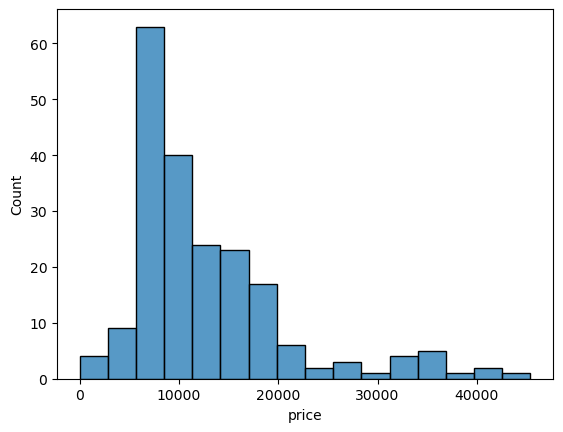

In [18]:
sns.histplot(df['price']);

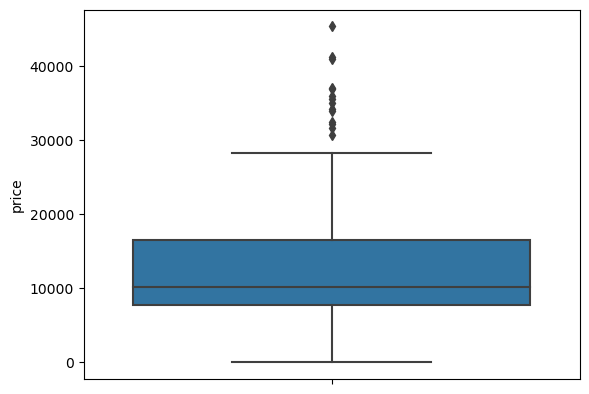

In [26]:
sns.boxplot(data=df, y='price');

## 4. Visualização de Dados

Plotando gráfico de dispersão utilizando as colunas `price` e `engine-size`

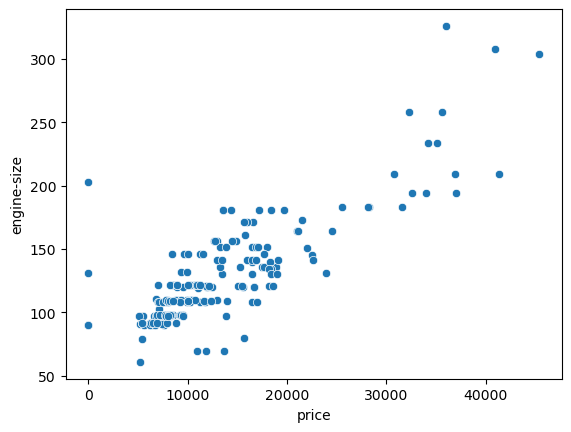

In [20]:
sns.scatterplot(data = df, x='price', y='engine-size');